### 90803 Final Project
# Classification of cities into Growth Categories

**Team 14**

Chi-Shiun Tsai & Colton Lapp

### Import Modules

In [1]:
import os
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler
import geopandas as gpd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
import warnings
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import svm

%matplotlib inline
pd.set_option('display.max_columns', 500)

#### Set Seed

In [2]:
seed = 0

### Read in Data

In [52]:
#Set Base Dir
base_dir = os.getcwd().split('/')
base_dir = '/'.join(base_dir[0:-1])
base_dir
df = pd.read_csv(base_dir + '/Team14_CL_CT_MG/data/data_all.csv', low_memory=False)
df.head()

,Name,Population 2020,Median Household Income,Median Home Value,Median Gross Rent,Renter Household,Total Housing Units,Race: White Alone,Hispanic or Latino,Population Age 25 or Older: Bachelor`s Degree,Population Age 25 or Older: Doctorate Degree,Pop 5-17 Speak only English at Home,Population Age 15 or Older Never Married,Population Age 15 or Older Never Married 2,Population Age 65 or more,Pop 65 or more Living in Nonfamily Households,Females 20-64 w Own Children 0-17,Workers Age 16 or more,Workers 16 or more who Took Public Transportation to work,Workers 16 or more who Worked at Home,Workers 16 or more who Drove Alone to Work,Employed in Professional/Scientific/Technical Services,Employed in Accommodation/Food Services,Employed in Health Care/Social Assistance,Employed in Arts/Entertainment/Recreation,Male 16+: Private For-Profit Self-Emp Inc Bus,Male 16+: Private Not-For-Profit Worker,Civilian Population 18+: Veteran,Population 35-64: Medicaid Coverage Only,Population 35-64: No Health Insurance Coverage,Households with No Internet Acces,Households Receiving Food Stamps/SNAP,Households Below the Poverty Leve,Gross Rent 50% + of Household Income,Owner Households by Year Moved In: 2017 or Later,Total Vacant Housing Units,Housing Units Built in 2014 or Later,state,GEOID,Population 2019,Pop Chng %,land_area,water_area,cases_per_100K,deaths_per_100K
0,"New York city, New York",8379552,67046.0,635200.0,1489.0,2143429.0,42.002186,41.330205,28.925997,16.000569,1.125072,7.664813,17.610035,18.069295,14.947255,4.979001,1.908419,46.830821,24.736883,3.465794,10.448387,4.848242,3.531358,8.708186,1.403011,1.143271,1.902047,1.705306,8.383276,3.427486,5.030627,7.244218,6.556830,6.763679,0.208245,3.913145,0.719466,36,3651000,8419316,-0.472295,777982727,434642000,5913.616647,220.640533
1,"Los Angeles city, California",3973278,65290.0,670700.0,1523.0,884176.0,38.099297,48.930480,48.066307,16.225771,1.007329,5.683670,19.986897,17.982834,12.855557,3.889962,1.788574,49.252959,4.056122,4.517605,33.341664,4.703748,4.288298,6.098239,2.086111,1.660996,1.278365,2.068393,7.988391,5.480588,3.824172,3.640193,5.838303,6.734288,0.256715,2.800433,0.887101,6,644000,3966936,0.159871,1214591312,87468461,6178.068445,67.066531
2,"Chicago city, Illinois",2699347,62097.0,267600.0,1154.0,590848.0,45.110392,47.731581,28.628813,16.758127,1.200438,8.816058,20.245897,19.983537,12.676177,4.820647,1.800250,49.382610,12.919050,4.194570,23.775417,6.130186,4.004228,7.006176,1.199698,1.064406,2.110918,2.475895,5.359926,4.764597,5.445095,7.012289,6.614933,5.035996,0.455777,5.058372,0.868655,17,1714000,2709534,-0.375969,588881854,17621529,7499.869841,133.847542
3,"Houston city, Texas",2313238,53600.0,186800.0,1086.0,499608.0,42.481318,51.539271,44.471948,13.576078,1.126473,8.046470,17.088946,15.180669,10.985813,3.587785,2.314159,47.686144,1.748501,2.939646,36.207040,4.086998,3.904484,5.408134,0.727076,0.958916,1.097639,2.983826,2.628869,10.073672,5.207333,5.392571,6.563527,5.208932,0.410939,4.663031,2.628869,48,4835000,2310432,0.121449,1658093679,81248080,4991.616106,57.677759
4,"Phoenix city, Arizona",1658422,60914.0,250800.0,1100.0,258077.0,37.805637,68.233176,42.647046,11.954557,0.754512,11.002447,16.492967,14.118542,10.974408,3.490125,2.569792,48.881527,1.325778,4.060667,35.624769,3.587989,4.214126,6.030914,0.925096,1.144582,1.225804,4.415402,5.078864,6.408743,3.939890,4.255793,4.791905,3.291020,0.706636,2.782283,1.114433,4,455000,1633017,1.555709,1340766401,3236736,7307.164034,116.139965


## Set Up Data

### Adjust Row Names
Note: If we want to include state effects, we could keep that column and create boolean values out of oit

In [53]:
#Set row equal to name
df.set_index('Name', inplace=True, drop=True)

#Drop GEOID and STATE column
df = df.drop( ['GEOID', 'state'], axis=1)
df.head(1)

,Population 2020,Median Household Income,Median Home Value,Median Gross Rent,Renter Household,Total Housing Units,Race: White Alone,Hispanic or Latino,Population Age 25 or Older: Bachelor`s Degree,Population Age 25 or Older: Doctorate Degree,Pop 5-17 Speak only English at Home,Population Age 15 or Older Never Married,Population Age 15 or Older Never Married 2,Population Age 65 or more,Pop 65 or more Living in Nonfamily Households,Females 20-64 w Own Children 0-17,Workers Age 16 or more,Workers 16 or more who Took Public Transportation to work,Workers 16 or more who Worked at Home,Workers 16 or more who Drove Alone to Work,Employed in Professional/Scientific/Technical Services,Employed in Accommodation/Food Services,Employed in Health Care/Social Assistance,Employed in Arts/Entertainment/Recreation,Male 16+: Private For-Profit Self-Emp Inc Bus,Male 16+: Private Not-For-Profit Worker,Civilian Population 18+: Veteran,Population 35-64: Medicaid Coverage Only,Population 35-64: No Health Insurance Coverage,Households with No Internet Acces,Households Receiving Food Stamps/SNAP,Households Below the Poverty Leve,Gross Rent 50% + of Household Income,Owner Households by Year Moved In: 2017 or Later,Total Vacant Housing Units,Housing Units Built in 2014 or Later,Population 2019,Pop Chng %,land_area,water_area,cases_per_100K,deaths_per_100K
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"New York city, New York",8379552,67046.0,635200.0,1489.0,2143429.0,42.002186,41.330205,28.925997,16.000569,1.125072,7.664813,17.610035,18.069295,14.947255,4.979001,1.908419,46.830821,24.736883,3.465794,10.448387,4.848242,3.531358,8.708186,1.403011,1.143271,1.902047,1.705306,8.383276,3.427486,5.030627,7.244218,6.55683,6.763679,0.208245,3.913145,0.719466,8419316,-0.472295,777982727,434642000,5913.616647,220.640533


# Final Data Cleaning

In [54]:
starting_rows = df.shape[0]

# Drop rows with infinite growth rates

# Find the indices of positive or negative infinity
inf_indices = np.isinf(df['Pop Chng %'])
# Drop rows
df = df[~inf_indices]

#Replace the missing value code from census data
df = df.replace(-666666666, np.nan)

#Forgot to normalize renter HH by population 
df['Renter Household'] = df['Renter Household']/df['Population 2020']

#Drop rows with NaN
df = df.dropna()

print("Went from {} rows to {} rows after cleaning".format(starting_rows, df.shape[0]))

Went from 19495 rows to 16665 rows after cleaning


# Exploratory Data Analysis of Target Variable: Growth Rates

### Deciding how to classify growth rates
1. Small cities have much larger percentage changes in population due to base rate effect. Should we consider them differently?
2. Should we do a binary classification of growth/no growth or should we consider cities with growth rates close to 0 as "neutral"? Should we vary these cutoffs for city size considering that small growth rates for a big city are more significant than medium growth rates for a tiny city?

#### Investigate distribution of Population Size and various cutoffs for cities


In [55]:
total = df.dropna().shape[0]
num_100K = (df['Population 2020'] > 100000).sum()
num_50K = (df['Population 2020'] > 50000).sum()
num_25K = (df['Population 2020'] > 25000).sum()
num_10K = (df['Population 2020'] > 10000).sum()
num_5K = (df['Population 2020'] > 5000).sum()
num_1K = (df['Population 2020'] > 1000).sum()

print("\nHow many cities fall into different population levels?:\n", '-'*50, sep="")
print("Number of cities w/ >100K Pop:  ", num_100K, "   ... ",  round(100*num_100K/total, 3), "%", sep="" )
print("Number of cities w/ >50K Pop:   ", num_50K, "   ... ",  round(100*num_50K/total, 3), "%", sep="" )
print("Number of cities w/ >20K Pop:   ", num_25K, "  ... ",  round(100*num_25K/total, 3), "%", sep="" )
print("Number of cities w/ >10K Pop:   ", num_10K, "  ... ",  round(100*num_10K/total, 3), "%", sep="" )
print("Number of cities w/ >5K Pop:    ", num_5K, "  ... ",  round(100*num_5K/total, 3), "%", sep="" )
print("Number of cities w/ >1K Pop:    ", num_1K, " ... ",  round(100*num_1K/total, 3), "%", sep="" )
print('-'*50, "\n\n")


How many cities fall into different population levels?:
--------------------------------------------------
Number of cities w/ >100K Pop:  308   ... 1.848%
Number of cities w/ >50K Pop:   775   ... 4.65%
Number of cities w/ >20K Pop:   1516  ... 9.097%
Number of cities w/ >10K Pop:   3092  ... 18.554%
Number of cities w/ >5K Pop:    4745  ... 28.473%
Number of cities w/ >1K Pop:    10427 ... 62.568%
-------------------------------------------------- 




### Results:
Almost half of our cities have less than 1,000 people. Very few cities have more than 100K people. We may want to consider creating seperate models for different population sizes

### Plot kernal density of population with potential cutoff points

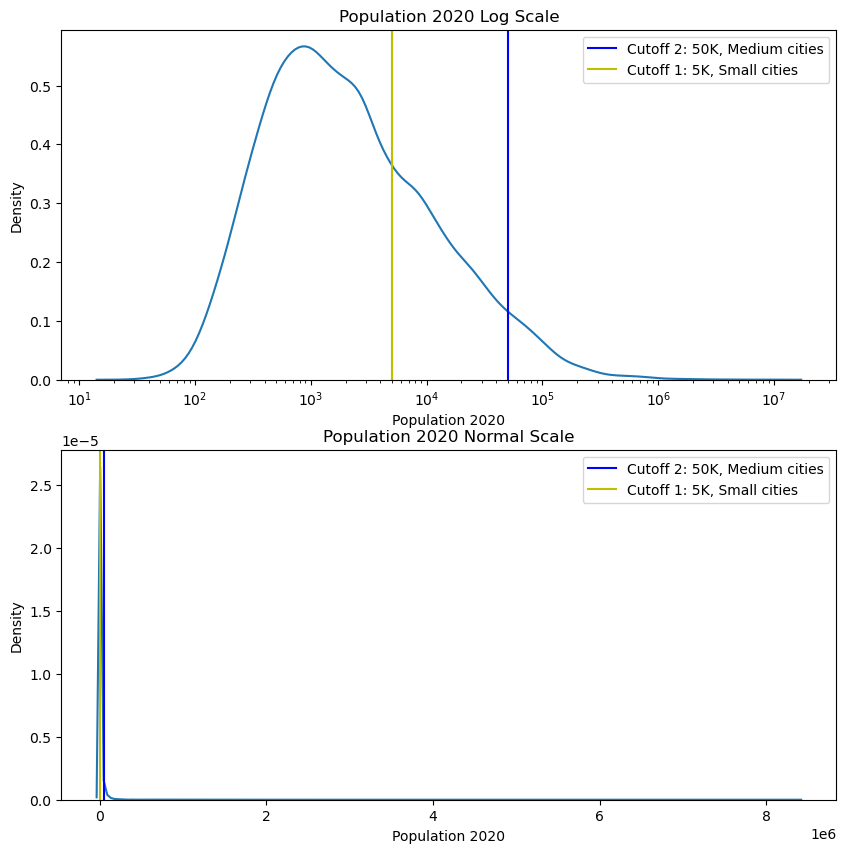

In [56]:
# create a figure with two subplots
fig, axs = plt.subplots(nrows=2, figsize = (10,10))

# plot the first kernel density plot in the first subplot
sns.kdeplot( df['Population 2020'], log_scale=True, ax=axs[0])
axs[0].set_title('Population 2020 Log Scale')

# plot the second kernel density plot in the second subplot
sns.kdeplot( df['Population 2020'], ax=axs[1])
axs[1].set_title('Population 2020 Normal Scale')

axs[0].axvline(x=50000, color='b', label='Cutoff 2: 50K, Medium cities')
axs[0].axvline(x=5000, color='y',  label='Cutoff 1: 5K, Small cities')
axs[0].legend()

axs[1].axvline(x=50000, color='b', label='Cutoff 2: 50K, Medium cities')
axs[1].axvline(x=5000, color='y',  label='Cutoff 1: 5K, Small cities')
axs[1].legend()

## Analysis: Our population size is incredibly skewed. 

### What do population growth rate changes look like for cities with different population sizes?

Text(0.5, 1.0, 'Population vs Pop Change Scatterplot')

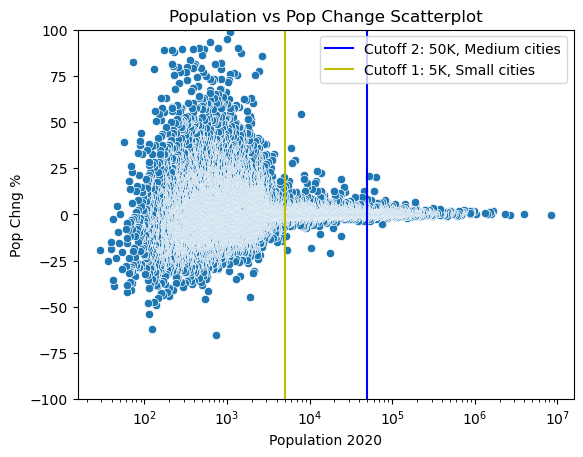

In [57]:
# create a scatterplot of population on the x-axis and change on the y-axis
p = sns.scatterplot(data=df, x='Population 2020', y='Pop Chng %')
p.set(ylim=(-100, 100))
plt.xscale('log')
plt.axvline(x=50000, color='b', label='Cutoff 2: 50K, Medium cities')
plt.axvline(x=5000, color='y',  label='Cutoff 1: 5K, Small cities')
plt.legend()

# set the plot title
plt.title('Population vs Pop Change Scatterplot')

### Looking at just cities with more than 5K people

Text(0.5, 1.0, 'Population vs Pop Change - Bigger cities only')

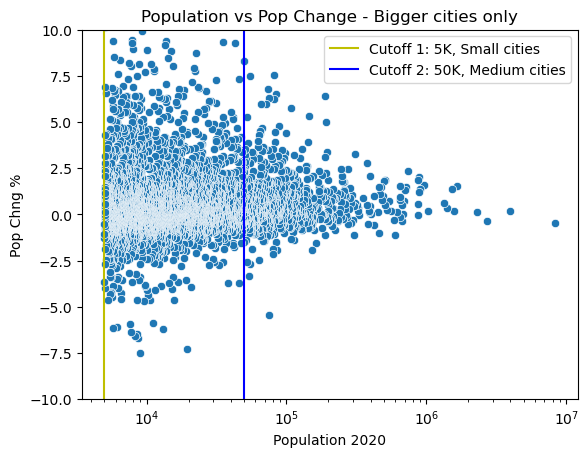

In [58]:
df_5K_more = df[df['Population 2020']>5000]

p = sns.scatterplot(data=df_5K_more, x='Population 2020', y='Pop Chng %')
p.set(ylim=(-10, 10))
plt.xscale('log')
plt.axvline(x=5000, color='y',  label='Cutoff 1: 5K, Small cities')
plt.axvline(x=50000, color='b', label='Cutoff 2: 50K, Medium cities')
plt.legend()

# set the plot title
plt.title('Population vs Pop Change - Bigger cities only')

In [59]:
#Set cutoff points
small_cut = 5000
med_cut = 50000

## How to determine categories for "Shrinking", "Neutral" and "Growing" depending on city size
 
**Calculating 33rd and 66th percentile of population changes**
We will look at the data with certain population sizes and see the 33rd and 66th percentile for growth rates. This can help us determine what values we should use determining whether or not a city is shrinking/neutral/or growing

In [60]:
cutoffs = [0, 100, 1000, 5000, 10000,50000, 100000, 1000000, 10000000]

df.replace([np.inf, -np.inf], np.nan, inplace=True)

def disp_num(num):
    if num<999:
        return str(num)
    else:
        return str( round(num/1000, 2) ) + "K"

for i in range(0, len(cutoffs)-1):
    low, high = [cutoffs[i], cutoffs[i+1]]
    df_temp = df[df['Population 2020']>low]
    df_temp = df_temp[df_temp['Population 2020']<high]
    
    mi = round( np.nanmin( df_temp['Pop Chng %']) )
    pct_33 = round(np.percentile(df_temp['Pop Chng %'].dropna(), 33), 0)
    pct_66 = round(np.percentile(df_temp['Pop Chng %'].dropna(), 66), 0)
    ma = round( np.nanmax( df_temp['Pop Chng %']) )

    
    print("\nPercentiles for:", disp_num(low),"-", disp_num(high), "\n", "-"*50)
    print("{}: {}".format('Count of cities', disp_num(df_temp.shape[0]) ) )
    print("{}: {} ~ {}".format("Shrinking", mi, pct_33))
    print("{}: {} ~ {}".format("Neutral", pct_33, pct_66))
    print("{}: {} ~ {}".format("Growing", pct_66, ma))


Percentiles for: 0 - 100 
 --------------------------------------------------
Count of cities: 109
Shrinking: -42 ~ -19.0
Neutral: -19.0 ~ -3.0
Growing: -3.0 ~ 162

Percentiles for: 100 - 1.0K 
 --------------------------------------------------
Count of cities: 6.12K
Shrinking: -65 ~ -6.0
Neutral: -6.0 ~ 6.0
Growing: 6.0 ~ 246

Percentiles for: 1.0K - 5.0K 
 --------------------------------------------------
Count of cities: 5.68K
Shrinking: -45 ~ -1.0
Neutral: -1.0 ~ 2.0
Growing: 2.0 ~ 225

Percentiles for: 5.0K - 10.0K 
 --------------------------------------------------
Count of cities: 1.65K
Shrinking: -19 ~ -0.0
Neutral: -0.0 ~ 1.0
Growing: 1.0 ~ 450

Percentiles for: 10.0K - 50.0K 
 --------------------------------------------------
Count of cities: 2.32K
Shrinking: -21 ~ -0.0
Neutral: -0.0 ~ 1.0
Growing: 1.0 ~ 204

Percentiles for: 50.0K - 100.0K 
 --------------------------------------------------
Count of cities: 467
Shrinking: -5 ~ 0.0
Neutral: 0.0 ~ 1.0
Growing: 1.0 ~ 21



# Data Transformations: Logging Skewed Features

How many of our variables have a heavy skew to them?

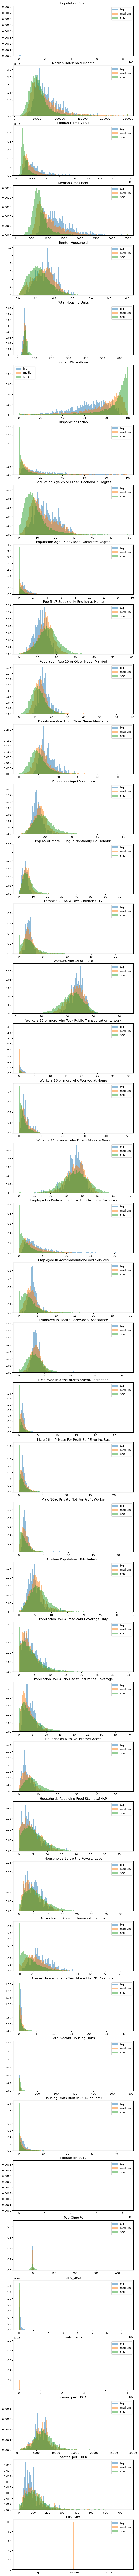

In [72]:
#Create variable to classify city as small/medium/large
def class_city(row):
    if row['Population 2020'] <small_cut:
        return "small"
    elif row['Population 2020'] <med_cut:
        return "medium"
    else:
        return "big"
    
# create new 'size' column using the apply function
df['City_Size'] = df.apply(lambda row: class_city(row), axis=1)  

# Group the data by the "group" column
groups = df.groupby('City_Size')

# Loop through each group and plot a histogram with a different color
n_vars = len(df.columns)
#n_vars=2
col_names = df.columns.values

#Plot in a loop
fig, axs = plt.subplots(nrows=n_vars, ncols=1, figsize=(8, 4*n_vars))
for i in range(0, n_vars):
    for name, group in groups:
        axs[i].hist(group[col_names[i]], alpha=0.5, label=name, bins=100, density=True)
    axs[i].legend()
    axs[i].set_title(col_names[i])

## Create Different Target Variables Depending on Growth Rates / City Size

In [9]:
# define a function to apply to the 'population' column
def growth_function_binary(row):
    if row['Pop Chng %'] > 0:
        return 1
    else:
        return 0

def growth_function_3classes(row):
    if row['Pop Chng %'] > .75:
        return 1
    elif row['Pop Chng %'] < -.75:
        return -1
    else:
        return 0

#Different growth rates for cities with more than 10K people and cities with 100K people
def growth_function_3classes_sized(row):
    if row['Population 2020'] > 100000:
        if row['Pop Chng %'] > .25:
            return 1
        elif row['Pop Chng %'] < -.25:
            return -1
        else:
            return 0
    elif row['Population 2020'] > 10000:
        if row['Pop Chng %'] > 1:
            return 1
        elif row['Pop Chng %'] < -1:
            return -1
        else:
            return 0
    elif row['Population 2020'] <= 10000:
        if row['Pop Chng %'] > 3:
            return 1
        elif row['Pop Chng %'] < -3:
            return -1
        else:
            return 0    
        
# create new 'growth' column using the apply function
df['Growing_bin'] = df.apply(lambda row: growth_function_binary(row), axis=1)
df['Growing_3Classes'] = df.apply(lambda row: growth_function_3classes(row), axis=1)
df['Growing_3Classes_Sized'] = df.apply(lambda row: growth_function_3classes_sized(row), axis=1)

df[['Population 2020', 'Pop Chng %', 'Growing_bin', 'Growing_3Classes', 'Growing_3Classes_Sized']].head(10)

,Population 2020,Pop Chng %,Growing_bin,Growing_3Classes,Growing_3Classes_Sized
Name,,,,,
"New York city, New York",8379552,-0.472295,0,0,-1
"Los Angeles city, California",3973278,0.159871,1,0,0
"Chicago city, Illinois",2699347,-0.375969,0,0,-1
"Houston city, Texas",2313238,0.121449,1,0,0
"Phoenix city, Arizona",1658422,1.555709,1,1,1
"Philadelphia city, Pennsylvania",1581531,0.155534,1,0,0
"San Antonio city, Texas",1529133,1.395812,1,1,1
"San Diego city, California",1414545,0.352731,1,0,1
"Dallas city, Texas",1338846,0.618813,1,0,1


## Train Test Split
Should we keep Population as a feature? I could see arguments for and against

In [10]:
y1 = df[['Growing_bin']]
y2 = df[['Growing_3Classes']]
y3 = df[['Growing_3Classes_Sized']]

X = df.drop(['Growing_3Classes', 'Growing_3Classes_Sized', 'Pop Chng %', 'Population 2019'], axis=1)

X_train, X_test, y1_train, y1_test = train_test_split( X, y1, test_size=0.25, random_state=seed)
X_train, X_test, y2_train, y2_test = train_test_split( X, y2, test_size=0.25, random_state=seed)
X_train, X_test, y3_train, y3_test = train_test_split( X, y3, test_size=0.25, random_state=seed)

X_train.head(3)

,Population 2020,Median Household Income,Median Home Value,Median Gross Rent,Renter Household,Total Housing Units,Race: White Alone,Hispanic or Latino,Population Age 25 or Older: Bachelor`s Degree,Population Age 25 or Older: Doctorate Degree,Pop 5-17 Speak only English at Home,Population Age 15 or Older Never Married,Population Age 15 or Older Never Married 2,Population Age 65 or more,Pop 65 or more Living in Nonfamily Households,Females 20-64 w Own Children 0-17,Workers Age 16 or more,Workers 16 or more who Took Public Transportation to work,Workers 16 or more who Worked at Home,Workers 16 or more who Drove Alone to Work,Employed in Professional/Scientific/Technical Services,Employed in Accommodation/Food Services,Employed in Health Care/Social Assistance,Employed in Arts/Entertainment/Recreation,Male 16+: Private For-Profit Self-Emp Inc Bus,Male 16+: Private Not-For-Profit Worker,Civilian Population 18+: Veteran,Population 35-64: Medicaid Coverage Only,Population 35-64: No Health Insurance Coverage,Households with No Internet Acces,Households Receiving Food Stamps/SNAP,Households Below the Poverty Leve,Gross Rent 50% + of Household Income,Owner Households by Year Moved In: 2017 or Later,Total Vacant Housing Units,Housing Units Built in 2014 or Later,land_area,water_area,cases_per_100K,deaths_per_100K,Growing_bin
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Deltona city, Florida",91847,56760.0,170000.0,1189.0,6883.0,36.063236,70.350692,36.911385,8.532668,0.124119,14.470805,13.635720,11.849053,16.122465,3.712696,1.709364,43.882762,0.107788,2.962536,36.378978,1.976112,3.192265,6.445502,1.210709,1.009287,0.765403,7.142313,3.340338,5.348024,3.353403,6.073143,3.726850,1.959781,0.687012,2.763291,0.182913,96537108,9151400,4081.800819,82.218320,1
"Encampment town, Wyoming",432,43170.0,184000.0,1031.0,63.0,78.703704,100.000000,0.000000,14.351852,1.620370,24.305556,11.342593,7.870370,18.287037,9.722222,0.462963,46.296296,0.000000,6.250000,34.259259,2.083333,2.546296,9.490741,2.314815,0.000000,1.157407,7.870370,0.000000,1.851852,9.722222,0.000000,3.703704,0.000000,4.861111,28.472222,3.009259,4136211,0,6276.122869,99.515690,0
"Lamberton city, Minnesota",831,50357.0,64100.0,600.0,79.0,51.985560,93.742479,3.008424,6.859206,0.240674,17.689531,11.793020,7.220217,25.631769,9.386282,2.647413,42.839952,0.000000,2.166065,31.768953,0.481348,0.000000,8.182912,3.249097,0.722022,1.925391,6.979543,2.647413,0.601685,10.348977,1.805054,3.850782,0.240674,1.684717,10.348977,1.083032,1979346,0,8609.227934,171.131442,1


## Check for Class Imbalances

In [11]:
y3_train.value_counts()

Growing_3Classes_Sized
 0                        5528
 1                        5087
-1                        4006
dtype: int64

**Results: Looks pretty balanced!**


# Scale Datasets

In [12]:
#create a RobustScaler object
scaler = RobustScaler()
#Fit
scaler.fit(X_train)

#Transform X_train and X_test
X_train_RS = pd.DataFrame(  scaler.transform(X_train), columns = X_train.columns)
X_train_RS.set_index( X_train.index , drop=True, inplace=True)

X_test_RS =  pd.DataFrame( scaler.transform(X_test), columns = X_test.columns)
X_test_RS.set_index( X_test.index , drop=True, inplace=True)

X_train_RS.head(3)

,Population 2020,Median Household Income,Median Home Value,Median Gross Rent,Renter Household,Total Housing Units,Race: White Alone,Hispanic or Latino,Population Age 25 or Older: Bachelor`s Degree,Population Age 25 or Older: Doctorate Degree,Pop 5-17 Speak only English at Home,Population Age 15 or Older Never Married,Population Age 15 or Older Never Married 2,Population Age 65 or more,Pop 65 or more Living in Nonfamily Households,Females 20-64 w Own Children 0-17,Workers Age 16 or more,Workers 16 or more who Took Public Transportation to work,Workers 16 or more who Worked at Home,Workers 16 or more who Drove Alone to Work,Employed in Professional/Scientific/Technical Services,Employed in Accommodation/Food Services,Employed in Health Care/Social Assistance,Employed in Arts/Entertainment/Recreation,Male 16+: Private For-Profit Self-Emp Inc Bus,Male 16+: Private Not-For-Profit Worker,Civilian Population 18+: Veteran,Population 35-64: Medicaid Coverage Only,Population 35-64: No Health Insurance Coverage,Households with No Internet Acces,Households Receiving Food Stamps/SNAP,Households Below the Poverty Leve,Gross Rent 50% + of Household Income,Owner Households by Year Moved In: 2017 or Later,Total Vacant Housing Units,Housing Units Built in 2014 or Later,land_area,water_area,cases_per_100K,deaths_per_100K,Growing_bin
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Deltona city, Florida",20.223561,0.230490,0.573267,1.347826,11.584906,-0.797428,-1.072642,3.836635,0.026752,-0.002509,-0.055030,0.228548,0.338377,-0.157014,-0.425781,-0.102909,-0.106138,0.414025,0.473271,0.049265,0.341400,0.238139,0.065091,0.748613,0.287473,-0.053789,0.344711,0.113736,0.518272,-0.500498,0.294229,-0.256440,0.124794,0.542316,-0.379820,-0.066037,9.03334,67.119710,-0.899299,-0.240080,0.0
"Encampment town, Wyoming",-0.172468,-0.305965,0.711881,0.889855,-0.113208,2.583286,0.488792,-0.391156,0.771238,2.339123,1.312698,-0.145871,-0.354898,0.075197,0.941565,-0.785334,0.105449,0.000000,1.716299,-0.148573,0.388896,-0.001828,0.856183,1.796509,-0.467118,0.241875,0.535370,-0.720882,-0.327410,0.613236,-0.828715,-0.261054,-0.605695,5.989515,3.223304,2.331647,0.01498,-0.056882,-0.146699,-0.033962,-1.0
"Lamberton city, Minnesota",-0.083445,-0.022263,-0.475248,-0.359420,-0.085763,0.464960,0.159250,-0.046574,-0.187345,0.179898,0.392601,-0.072326,-0.468186,0.863125,0.865129,0.410687,-0.197559,0.000000,0.172117,-0.381000,-0.320731,-0.947736,0.516435,2.683229,0.072699,0.821116,0.302086,-0.059398,-0.629811,0.722838,-0.494954,-0.231741,-0.515986,1.844321,0.683319,0.697564,-0.19553,-0.056882,0.653500,0.819420,0.0


# Model 1: Logistic Regression

### Baseline model

In [13]:
#Initialize LR model with baseline parameters
LR_baseline = LogisticRegression(random_state=seed, C=1, max_iter=1000, penalty='l2')
CVs_LR_baseline = cross_val_score(LR_baseline, X_train_RS, y3_train.squeeze(), cv=10, scoring = 'accuracy') 

print("Mean CV accuracy Score: ", np.mean(CVs_LR_baseline))
print("Std Dev CV accuracy Score: ", np.std(CVs_LR_baseline))

LR_baseline.fit(X_train_RS, y3_train.squeeze())
print("\nClassification Report:\n", classification_report(y3_test, LR_baseline.predict(X_test_RS)))

Mean CV accuracy Score:  0.4740440206348479
Std Dev CV accuracy Score:  0.012570226960928113

Classification Report:
               precision    recall  f1-score   support

          -1       0.47      0.19      0.28      1405
           0       0.49      0.72      0.58      1755
           1       0.40      0.40      0.40      1714

    accuracy                           0.45      4874
   macro avg       0.45      0.44      0.42      4874
weighted avg       0.45      0.45      0.43      4874



## Tune Parameters of Logistic Regression 
### Use GridSearch CV

In [ ]:
#Define new LogReg
LR_GS = LogisticRegression(random_state=seed)

# define parameter grid for grid search
param_grid = {
    'penalty': ['l1', None],
    'C': [0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

# set warnings to false
warnings.filterwarnings('ignore')

#GridSearchCV object
GS = GridSearchCV(estimator=LR_GS, param_grid=param_grid, cv=5)
GS.fit(X_train_RS, y3_train.squeeze())

#Print Optimal Parameters
best_params = GS.best_params_
print("Optimal parameters:",best_params)

#Set Best Parameters
LR_GS.set_params(**best_params)

#Get CV Score
CVs_LR_GS = cross_val_score(LR_GS, X_train_RS, y3_train.squeeze(), cv=10, scoring = 'f1') 
print("Mean CV F1 Score: ", np.nanmean(CVs_LR_GS))
print("Std Dev CV F1 Score: ", np.nanstd(CVs_LR_GS))

# set warnings back to true
warnings.filterwarnings('default')

Optimal parameters: {'C': 0.1, 'penalty': None, 'solver': 'newton-cg'}


### Print Classification Report of Tuned LR

In [ ]:
LR_GS.fit(X_train_RS, y3_train.squeeze())
print("\nClassification Report:\n", classification_report(y3_test, LR_GS.predict(X_test_RS)))

# Model 2: Random Forest

In [ ]:
RF_baseline = RandomForestClassifier(random_state=seed)

CVs_RF_baseline = cross_val_score(RF_baseline, X_train_RS, y3_train.squeeze(), cv=10, scoring = 'accuracy') 

print("Mean CV accuracy Score: ", np.mean(CVs_RF_baseline))
print("Std Dev CV accuracy Score: ", np.std(CVs_RF_baseline))

RF_baseline.fit(X_train_RS, y3_train.squeeze())
print("\nClassification Report:\n", classification_report(y3_test, RF_baseline.predict(X_test_RS)))

## Tune Parameters of RF

In [ ]:
#Define new RF
RF_GS = RandomForestClassifier(random_state=seed)

# define parameter grid for grid search
param_grid = {
    'n_estimators': [50, 200],
    'max_depth': [3, 7],
    'max_features': ['sqrt', 'log2']
}

# set warnings to false
warnings.filterwarnings('ignore')

#GridSearchCV object
GS2 = GridSearchCV(estimator=RF_GS, param_grid=param_grid, cv=5)
GS2.fit(X_train_RS, y3_train.squeeze())


#Print Optimal Parameters
best_params = GS2.best_params_
print("Optimal parameters:",best_params)

#Set Best Parameters
RF_GS.set_params(**best_params)

#Get CV Score
CVs_RF_GS = cross_val_score(RF_GS, X_train_RS, y3_train.squeeze(), cv=10, scoring = 'f1') 
print("Mean CV F1 Score: ", np.nanmean(CVs_RF_GS))
print("Std Dev CV F1 Score: ", np.nanstd(CVs_RF_GS))

# set warnings back to true
warnings.filterwarnings('default')

### Classification report of TUNED RF

In [ ]:
RF_GS.fit(X_train_RS, y3_train.squeeze())
print("\nClassification Report:\n", classification_report(y3_test, RF_GS.predict(X_test_RS)))

# Model 3: Support Vector Machine

In [ ]:
SVM_baseline = svm.SVC(random_state = seed)
CVs_SVM_baseline = cross_val_score(SVM_baseline, X_train_RS, y3_train.squeeze(), cv=10, scoring = 'accuracy') 

print("Mean CV accuracy Score: ", np.mean(CVs_SVM_baseline))
print("Std Dev CV accuracy Score: ", np.std(CVs_SVM_baseline))

SVM_baseline.fit(X_train_RS, y3_train.squeeze())
print("\nClassification Report:\n", classification_report(y3_test, SVM_baseline.predict(X_test_RS)))

### Tune Parameters of SVM

In [ ]:
#Define new SVM
SVM_GS = svm.SVC(random_state=seed)

# define parameter grid for grid search
param_grid = {
    'C': [0.1,  10],
    'kernel': ['linear', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# set warnings to false
warnings.filterwarnings('ignore')

#GridSearchCV object
GS3 = GridSearchCV(estimator=SVM_GS, param_grid=param_grid, cv=2)
GS3.fit(X_train_RS, y3_train.squeeze())


#Print Optimal Parameters
best_params = GS3.best_params_
print("Optimal parameters:",best_params)

#Set Best Parameters
SVM_GS.set_params(**best_params)

#Get CV Score
CVs_SVM_GS = cross_val_score(SVM_GS, X_train_RS, y3_train.squeeze(), cv=10, scoring = 'f1') 
print("Mean CV F1 Score: ", np.nanmean(CVs_SVM_GS))
print("Std Dev CV F1 Score: ", np.nanstd(CVs_SVM_GS))

# set warnings back to true
warnings.filterwarnings('default')

### Classification Report of TUNED SVM

In [ ]:
SVM_GS.fit(X_train_RS, y3_train.squeeze())
print("\nClassification Report:\n", classification_report(y3_test, SVM_GS.predict(X_test_RS)))

# References:
- https://stackoverflow.com/questions/26886653/create-new-column-based-on-values-from-other-columns-apply-a-function-of-multi
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
- https://stackoverflow.com/questions/75220289/difference-between-gridsearch-best-estimator-and-best-params
- https://www.statology.org/seaborn-log-scale/
- https://numpy.org/doc/stable/reference/generated/numpy.percentile.html
- https://stackoverflow.com/questions/25212986/how-to-set-some-xlim-and-ylim-in-seaborn-lmplot-facetgrid
- https://numpy.org/doc/stable/reference/generated/numpy.percentile.html
- https://sparkbyexamples.com/pandas/pandas-drop-infinite-values-from-dataframe/
- https://www.tutorialspoint.com/return-the-maximum-of-an-array-or-maximum-ignoring-any-nans-in-python#:~:text=To%20return%20the%20maximum%20of,an%20ndarray%20scalar%20is%20returned.
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

